In [2]:
import pandas as pd
import numpy as np
import string
import os
import sys
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [3]:
# The true prices used by the cashier

p_fish = 150
p_chips = 50
p_ketchup = 100

In [4]:
# sample meal prices: generate data meal prices for 5 days.
np.random.seed(100)
portions = np.random.randint(low=1, high=10, size=3 )
portions

X = []; y = []; days=10

for i in range(days):
    portions = np.random.randint(low=1, high=10, size=3 )
    price = p_fish * portions[0] + p_chips * portions[1] + p_ketchup * portions[2]    
    X.append(portions)
    y.append(price)
    
X = np.array(X)
y = np.array(y)

In [5]:
print (X,y)

[[8 8 1]
 [5 3 6]
 [3 3 3]
 [2 1 9]
 [5 1 7]
 [3 5 2]
 [6 4 5]
 [5 4 8]
 [2 2 8]
 [8 1 3]] [1700 1500  900 1250 1500  900 1600 1750 1200 1550]


In [ ]:
# Create a linear model
from tensorflow import keras
from keras.layers import Input, Dense , Activation
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import Callback

In [7]:
price_guess = [np.array([[ 50 ],
        [   50],
        [  50 ]]) ]

In [ ]:
model_input = Input(shape=(3,), dtype='float32')
model_output = Dense(1, activation='linear', use_bias=False, 
                     name='LinearNeuron',
                     weights=price_guess)(model_input)

sgd = SGD(lr=0.01)
model = Model(model_input, model_output)
model.compile(loss="mean_squared_error", optimizer=sgd)

In [ ]:
model.summary()

In [ ]:
history = model.fit(X, y, batch_size=20, epochs=30,verbose=2)

l4 = history.history['loss']

In [ ]:
model.get_layer('LinearNeuron').get_weights()

In [12]:
## XOR Problem in Keras

In [13]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [ ]:
# XOR is not a linearly seperable problem
# Lets try Linear Model  & see its not working. Add a non-linear layer


model_input = Input(shape=(2,), dtype='float32')
z = Dense(2,name='HiddenLayer', kernel_initializer='ones', activation='relu')(model_input)

# z = Activation('relu')(z)
z = Dense(1, name='OutputLayer')(z)
model_output = Activation('sigmoid')(z)
model = Model(model_input, model_output)

# model.summary()

In [ ]:
sgd = SGD(lr=0.5)

# model.compile(loss="mse", optimizer=sgd)
model.compile(loss="binary_crossentropy", optimizer=sgd)

In [ ]:
model.fit(X, y, batch_size=4, epochs=200,verbose=0)

preds = np.round(model.predict(X),decimals=3)

pd.DataFrame({'Y_actual':list(y), 'Predictions':list(preds)})

In [ ]:
model.get_weights()

In [ ]:
hidden_layer_output = Model(inputs=model.input,
                                 outputs=model.get_layer('HiddenLayer').output)

In [ ]:
projection = hidden_layer_output.predict(X)

In [ ]:
for i in range(4):
    print (X[i], projection[i])

In [7]:
import matplotlib.pyplot as plt

NameError: name 'projection' is not defined

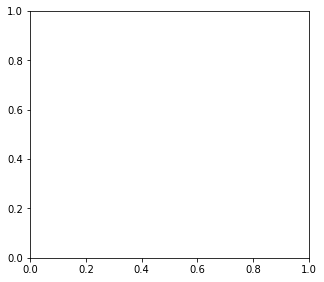

In [9]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(211)
plt.scatter(x=projection[:, 0], y=projection[:, 1], c=('g'))

ax.set_xlabel('X axis (h1)')
ax.set_ylabel('Y axis (h2)')
ax.set_label('Transformed Space')

#hidden layer transforming the input to a linearly seperable.

x1, y1 = [projection[0, 0]-0.5, projection[3, 0]], [projection[0, 1]+0.5, projection[3, 1]+0.5]
plt.plot(x1, y1)

for i, inputx in enumerate(X):
    ax.annotate(str(inputx), (projection[i, 0]+0.1,projection[i, 1]))
ax = fig.add_subplot(212)
ax.set_label('Original Space')
plt.scatter(x=X[:, 0], y=X[:, 1], c=('b'))

for i, inputx in enumerate(X):
    ax.annotate(str(inputx), (X[i, 0]+0.05,X[i, 1]))
    
plt.show()

In [17]:
# Logistic neuron: Logistic regression

In [18]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [19]:
X = data.data
y = data.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
X_train.shape

(398, 30)

In [ ]:
model_input = Input(shape=(30,), dtype='float32')

model_output = Dense(1, activation='sigmoid',
                     name='SigmoidNeuron')(model_input)
sgd = SGD(lr=0.01)
model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [ ]:
scaler = StandardScaler()

model.fit(scaler.fit_transform(X_train), y_train, batch_size=10, epochs=5,verbose=2,
          validation_data=(scaler.fit_transform(X_test), y_test))

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression

m=82.90456141637904, c=-3.709228868670303


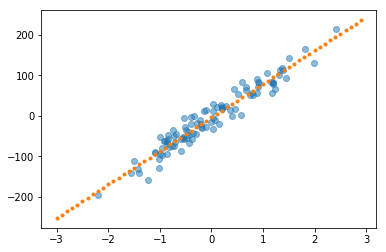

In [25]:
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)

x = x.flatten()

slope, intercept, _,_,_ = stats.linregress(x,y)

print("m={}, c={}".format(slope,intercept))

best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

plt.show()

In [27]:
def gradient_descent(x, y, theta_init, step=0.1, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

In [28]:
xaug = np.c_[np.ones(x.shape[0]), x]

theta_i = [-15, 40] + np.random.rand(2)

history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)

theta = history[-1]

print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))

print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))


Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


/Users/junxxx/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


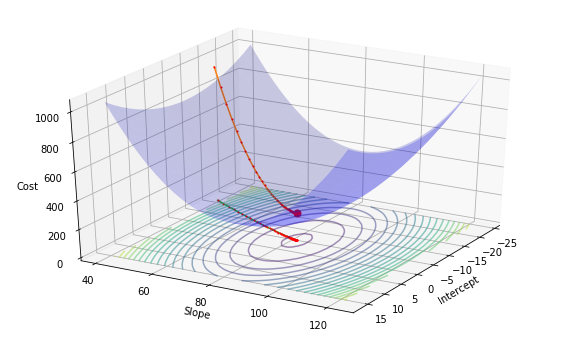

In [29]:
from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);

#ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);


plt.show()


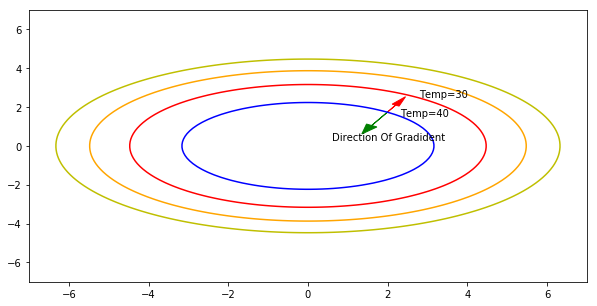

In [30]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
xlist = np.linspace(-7.0, 7.0, 100) # Create 1-D arrays for x,y dimensions
ylist = np.linspace(-7.0, 7.0, 100)
X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
Z = 50 - X**2 - 2*Y**2  # Compute function values on the grid
plt.contour(X, Y, Z, [10,20,30,40], colors = ['y','orange','r','b'], linestyles = 'solid')
ax.annotate('Direction Of Gradident', xy=(.6, 0.3), xytext=(.6, 0.3))
ax.annotate('Temp=30', xy=(2.8, 2.5), xytext=(2.8, 2.5))
ax.annotate('Temp=40', xy=(2.3, 2), xytext=(2.3, 1.5))
#ax.arrow(0, 0, 6.9, 6.8, head_width=0.5, head_length=0.5, fc='k', ec='k')
ax.arrow(2, 1.75, 2*2/20, 4*1.75/20, head_width=0.2, head_length=0.5, fc='r', ec='r')
ax.arrow(2, 1.75, -2*2/10, -4*1.75/10, head_width=0.3, head_length=0.5, fc='g', ec='g')

plt.show()


In [31]:
import numpy as np
import matplotlib.pylab as plt


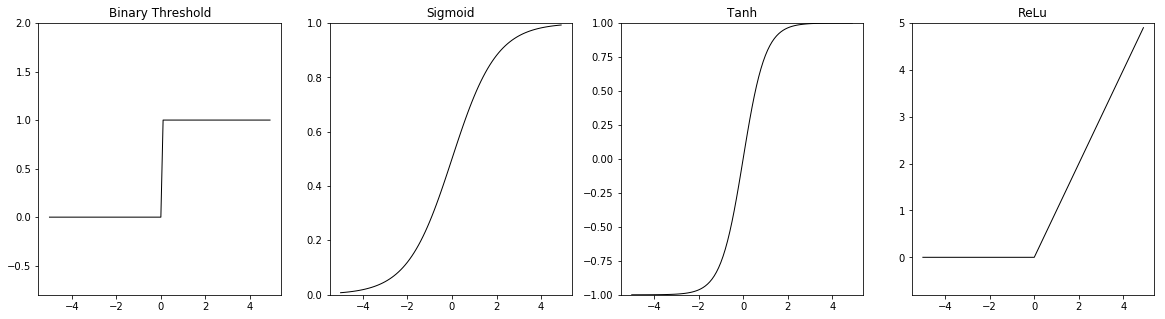

In [32]:
def step(x):
    return np.array(x > 0, dtype=np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y_step = step(x)
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
ax = axes[0]
ax.plot(x, y_step,label='Binary Threshold',  color='k', lw=1, linestyle=None)
ax.set_ylim(-0.8,2)
ax.set_title('Binary Threshold')

ax = axes[1]
ax.plot(x, y_sigmoid,label='Sigmoid',  color='k', lw=1, linestyle=None)
ax.set_ylim(-0.001,1)
ax.set_title('Sigmoid')

ax = axes[2]
ax.plot(x, y_tanh,label='Tanh',  color='k', lw=1, linestyle=None)
ax.set_ylim(-1.,1)
ax.set_title('Tanh')

ax = axes[3]
ax.plot(x, y_relu,label='ReLu',  color='k', lw=1, linestyle=None)
ax.set_ylim(-0.8,5)
ax.set_title('ReLu')


plt.show()

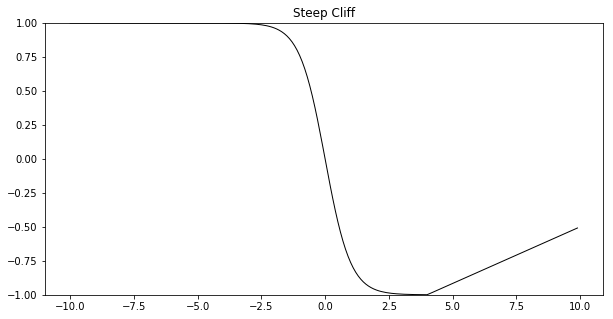

In [33]:
x = np.arange(-10.0, 10.0, 0.1)

def lineup(x):
    return (x-4)/12-1

def cliff(x):
    x1 = -tanh(x[x<4])
    x2 = np.apply_along_axis(lineup, 0, x[x>4])
    return np.concatenate([x1, x2])

y_cliff = cliff(x)

    
fig, axes = plt.subplots(ncols=1, figsize=(10, 5))
ax = axes
ax.plot(x, y_cliff,label='Steep Cliff',  color='k', lw=1, linestyle=None)
ax.set_ylim(-1.,1)
ax.set_title('Steep Cliff')
plt.show()

In [34]:
## Polynomial curve fitting: Model Capacity

In [35]:
from math import sin, pi

N = 100; max_degree = 20
noise = np.random.normal(0, 0.2, N)

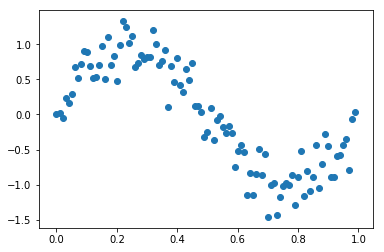

In [36]:
df = pd.DataFrame( index=list(range(N)),columns=list(range(1,max_degree)))

for i in range(N):
    df.loc[i]=[pow(i/N,n) for n in range(1,max_degree)]
    
df['y']=[sin(2*pi*x/N)+noise[x] for x in range(N)]

plt.scatter(x=df[1], y=df['y'])
plt.show()

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.initializers import RandomNormal

In [ ]:
degree = 3
X = df[list(range(1,degree+1))].values
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.60, random_state=42)

In [ ]:
model_input = Input(shape=(degree,), dtype='float32')
model_output = Dense(1, activation='linear', name='LinearNeuron')(model_input)

sgd = SGD(lr=0.4)
model = Model(model_input, model_output)
model.compile(loss="mean_squared_error", optimizer=sgd)

In [ ]:
history = model.fit(X_train,y_train , batch_size=10, epochs=4000,verbose=2, validation_data=(X_test,y_test) )

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
model.get_weights()

In [ ]:
plt.scatter(X_test[:,0], y_test)
plt.plot(np.sort(X_test[:,0]), y_pred[X_test[:,0].argsort()])
plt.title("Model fit for plynomial of degree {}".format(degree))

plt.show()